In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("EDS_1.csv", nrows=10000000)

In [4]:
def f(row):
    if row['normalized'] < -0.4307273:
        val = -1
    elif row['normalized'] > 0.4307273:
        val = 1
    else:
        val = 0
    return val

df['sax'] = df.apply(f, axis=1)

df = df[df['sax'] != 0]

In [19]:
train_size = int(len(df) * 0.95)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

def create_dataset(X, y):
    Xs, ys = [], []
    time_steps =1
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values 
        Xs.append(v)
        ys.append(y.iloc[i + time_steps]) 
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train['normalized'], train.sax)
X_test, y_test = create_dataset(test['normalized'], test.sax)

In [20]:
model = RandomForestRegressor(max_depth=4)

model.fit(X_train, y_train)


X_train_pred = model.predict(X_train)


X_test_pred = model.predict(X_test)



In [24]:

from sklearn.metrics import mean_absolute_error

train_loss = mean_absolute_error(X_train, X_train_pred)
test_loss = mean_absolute_error(X_test,X_test_pred)


In [25]:
print(train_loss)
print(test_loss)

0.7271448349250881
0.39865180165085734


In [29]:

THRESHOLD = 0.2
test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)

test_score_df['loss'] = test_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold


test_score_df['normalized'] = test[TIME_STEPS:].normalized
test_score_df['sax'] = test[TIME_STEPS:].sax

anomalies = test_score_df[test_score_df.anomaly == True]

In [30]:
test_score_df

,loss,threshold,anomaly,normalized,sax
9541196,0.398652,0.2,True,0.534908,1
9541197,0.398652,0.2,True,0.450876,1
9541198,0.398652,0.2,True,0.585562,1
9541199,0.398652,0.2,True,0.641171,1
9541200,0.398652,0.2,True,0.515472,1
...,...,...,...,...,...
9999986,0.398652,0.2,True,0.449585,1
9999987,0.398652,0.2,True,0.504631,1
9999988,0.398652,0.2,True,0.565461,1
9999989,0.398652,0.2,True,0.516798,1


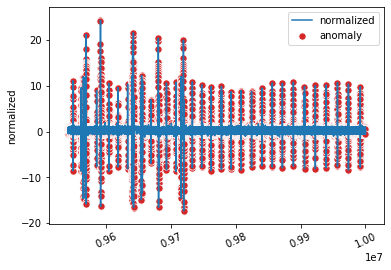

In [35]:
plt.plot(
  test[TIME_STEPS:].index,
  test[TIME_STEPS:].normalized,
  label='normalized'
);

sns.scatterplot(
  anomalies.index,
  anomalies.normalized,
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();
plt.savefig("random_forest.png")